# The Best Format to Save Pandas Data

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from collections import defaultdict
import os

In [3]:
import feather
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
from utils import Timer, MemoryTracker, GC, NotebookStyle, generate_dataset, size_of, benchmark, get_save_load

In [5]:
style = NotebookStyle()
style.override({'grid.color': 'lightgray'})

### CSV Baseline

In [6]:
formats = [('csv', {'index': None})]

In [7]:
csv_results = benchmark(formats, n_rounds=5)

Benchmarking round #1
	generating dataset...
	testing format: csv
Benchmarking round #2
	generating dataset...
	testing format: csv
Benchmarking round #3
	generating dataset...
	testing format: csv
Benchmarking round #4
	generating dataset...
	testing format: csv
Benchmarking round #5
	generating dataset...
	testing format: csv


In [8]:
csv_results.to_feather('baseline.feather')

In [9]:
baseline = feather.read_dataframe('baseline.feather')

In [10]:
baseline

,filename,format,load_ram_delta_mb,load_time,save_ram_delta_mb,save_time,size_mb,run_no
0,random.csv,csv,497.046875,11.578071,-15.054688,32.467833,769.94,0
1,random.csv,csv,497.800781,11.618422,-0.703125,29.729215,779.44,1
2,random.csv,csv,497.453125,11.348433,-259.796875,32.013035,768.66,2
3,random.csv,csv,381.218750,11.560992,-15.660156,32.221656,775.94,3
4,random.csv,csv,365.789062,11.381141,-15.160156,31.467536,767.22,4


### Categoricals As Strings

In [11]:
formats = [
    ('hdf', {'key': 'data', 'format': 'table', 'complevel': 5}),
    ('pickle',),
    ('msgpack', {'compress': 'zlib'}),
    ('feather', {'compress': True}),
    ('parquet', {'engine': 'pyarrow', 'compression': 'gzip'})
]

In [12]:
results = benchmark(formats)

Benchmarking round #1
	generating dataset...
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarking round #2
	generating dataset...
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarking round #3
	generating dataset...
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarking round #4
	generating dataset...
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarking round #5
	generating dataset...
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarking round #6
	generating dataset...
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarki

In [13]:
results.to_feather('one_million_cats_str.feather')

In [14]:
results = feather.read_dataframe('one_million_cats_str.feather')

In [15]:
results = pd.concat([baseline, results], axis=0, sort=False)

In [16]:
avg = results.groupby('format').mean().reset_index().drop(columns=['run_no'])
avg

,format,load_ram_delta_mb,load_time,save_ram_delta_mb,save_time,size_mb
0,csv,447.861719,11.497412,-61.275000,31.579855,772.2400
1,feather,1362.955078,5.805432,769.407422,17.984014,151.9915
2,hdf,2463.593555,16.041171,1312.811328,39.903412,1879.3320
3,msgpack,551.956055,4.816197,1200.184180,13.007535,628.9630
4,parquet,907.870508,0.918613,767.780469,13.307695,119.4065
5,pickle,1152.719922,3.549732,1472.766992,10.224760,651.4275


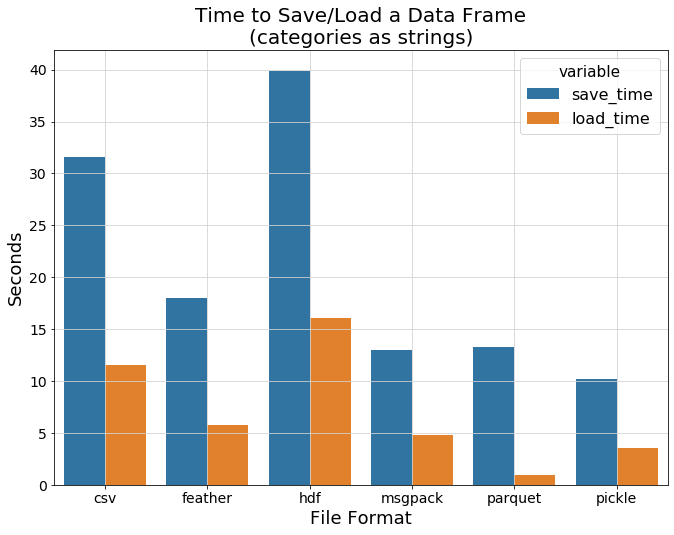

In [17]:
io_speed = avg[['format', 'save_time', 'load_time']].melt(id_vars='format')
ax = sns.barplot(x='format', y='value', hue='variable', data=io_speed)
_ = ax.set_xlabel('File Format')
_ = ax.set_ylabel('Seconds')
_ = ax.set_title('Time to Save/Load a Data Frame\n(categories as strings)')
ax.grid(True)

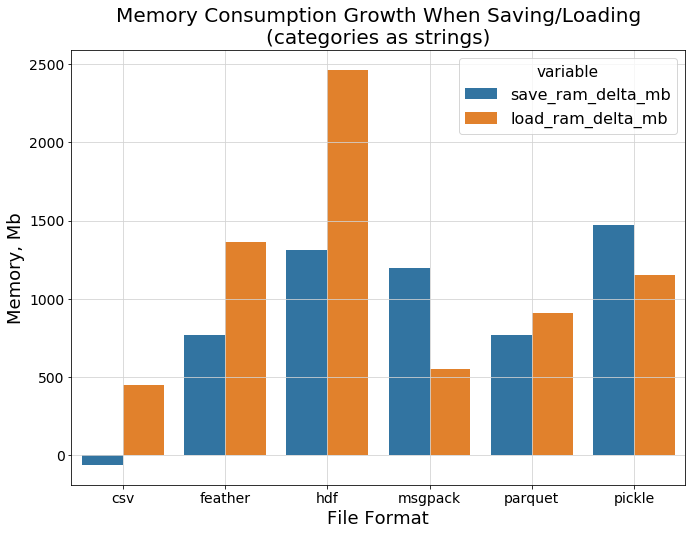

In [18]:
mem_size = avg[['format', 'save_ram_delta_mb', 'load_ram_delta_mb']].melt(id_vars='format')
ax = sns.barplot(x='format', y='value', hue='variable', data=mem_size)
_ = ax.set_xlabel('File Format')
_ = ax.set_ylabel('Memory, Mb')
ax.set_title('Memory Consumption Growth When Saving/Loading\n(categories as strings)')
ax.grid(True)

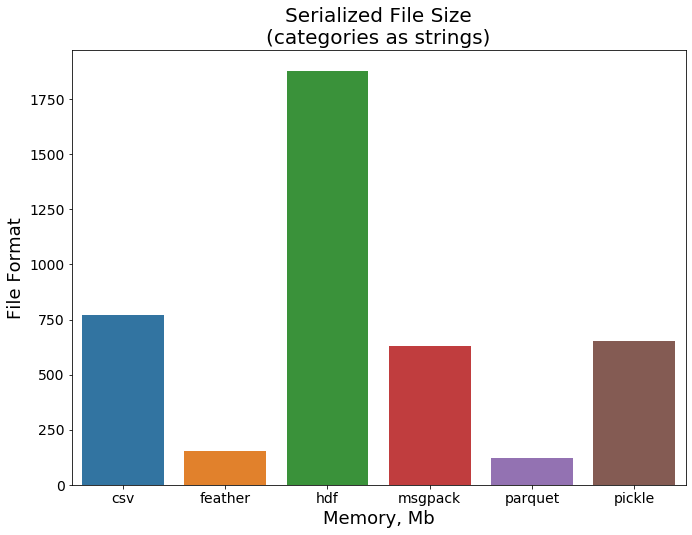

In [19]:
ax = sns.barplot(x='format', y='size_mb', data=avg)
_ = ax.set_xlabel('Memory, Mb')
_ = ax.set_ylabel('File Format')
_ = ax.set_title('Serialized File Size\n(categories as strings)')

### Categoricals As Dedicated Category Type

In [20]:
results = benchmark(formats, as_category=True)

Benchmarking round #1
	generating dataset...
	converting categorical columns into pandas.Category
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarking round #2
	generating dataset...
	converting categorical columns into pandas.Category
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarking round #3
	generating dataset...
	converting categorical columns into pandas.Category
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarking round #4
	generating dataset...
	converting categorical columns into pandas.Category
	testing format: hdf
	testing format: pickle
	testing format: msgpack
	testing format: feather
	testing format: parquet
Benchmarking round #5
	generating dataset...
	converting categorical columns into pandas.Category
	testing format: hdf
	testing 

In [21]:
results.to_feather('one_million_cats_category.feather')

In [22]:
results  = feather.read_dataframe('one_million_cats_category.feather')

In [23]:
results = pd.concat([baseline, results], axis=0)

In [24]:
avg = results.groupby('format').mean().reset_index().drop(columns=['run_no'])
avg

,format,load_ram_delta_mb,load_time,save_ram_delta_mb,save_time,size_mb
0,csv,447.861719,11.497412,-61.275000,31.579855,772.2400
1,feather,133.569141,1.164971,5.054688,7.512884,116.3380
2,hdf,100.424414,2.320098,0.080469,7.384206,1649.9160
3,msgpack,176.832812,0.882469,100.318164,6.226947,115.7150
4,parquet,374.455078,0.437604,60.024023,12.043670,119.5080
5,pickle,105.059766,0.130224,133.948828,0.610864,128.7795


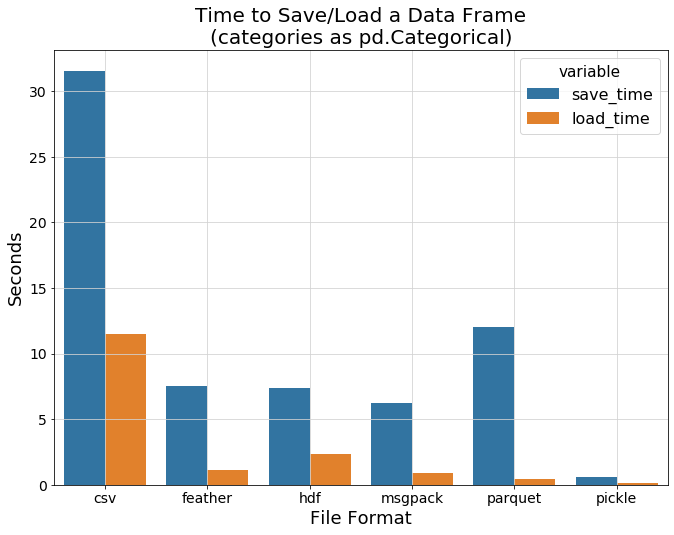

In [25]:
io_speed = avg[['format', 'save_time', 'load_time']].melt(id_vars='format')
ax = sns.barplot(x='format', y='value', hue='variable', data=io_speed)
_ = ax.set_xlabel('File Format')
_ = ax.set_ylabel('Seconds')
_ = ax.set_title('Time to Save/Load a Data Frame\n(categories as pd.Categorical)')
ax.grid(True)

In [26]:
results  = feather.read_dataframe('one_million_cats_category.feather')

In [27]:
avg = results.groupby('format').mean().reset_index().drop(columns=['run_no'])

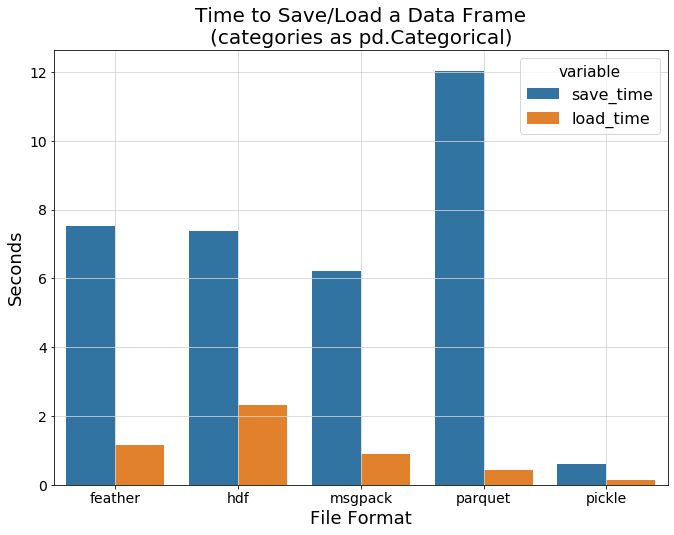

In [28]:
io_speed = avg[['format', 'save_time', 'load_time']].melt(id_vars='format')
ax = sns.barplot(x='format', y='value', hue='variable', data=io_speed)
_ = ax.set_xlabel('File Format')
_ = ax.set_ylabel('Seconds')
_ = ax.set_title('Time to Save/Load a Data Frame\n(categories as pd.Categorical)')
ax.grid(True)

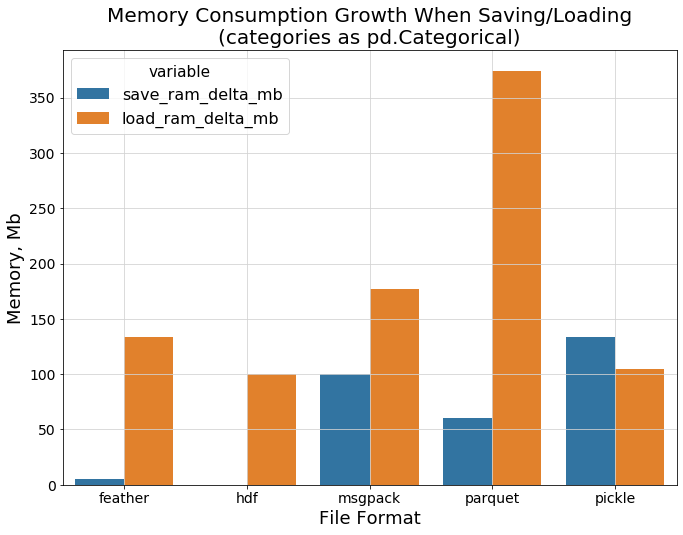

In [29]:
mem_size = avg[['format', 'save_ram_delta_mb', 'load_ram_delta_mb']].melt(id_vars='format')
ax = sns.barplot(x='format', y='value', hue='variable', data=mem_size)
_ = ax.set_xlabel('File Format')
_ = ax.set_ylabel('Memory, Mb')
ax.set_title('Memory Consumption Growth When Saving/Loading\n(categories as pd.Categorical)')
ax.grid(True)

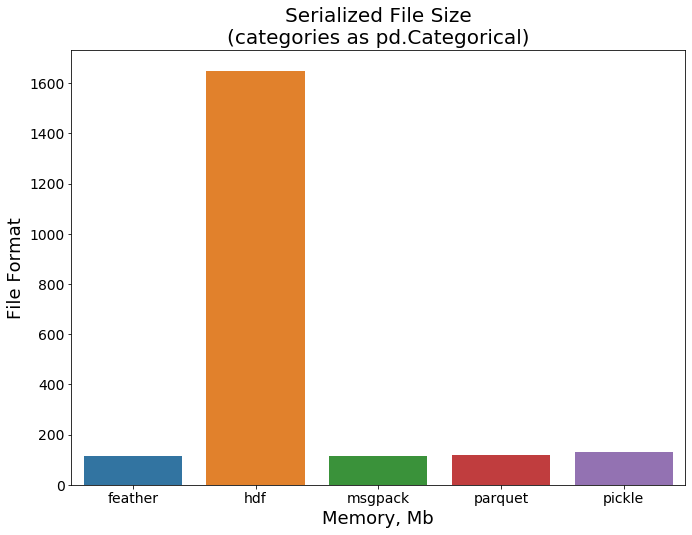

In [30]:
ax = sns.barplot(x='format', y='size_mb', data=avg)
_ = ax.set_xlabel('Memory, Mb')
_ = ax.set_ylabel('File Format')
_ = ax.set_title('Serialized File Size\n(categories as pd.Categorical)')